# SVD exercise

Using the MNIST dataset containing hand-written digits, do the following:

- [ ] single image compression using truncated SVD
- [ ] svd on whole dataset containing digits using 'eigendigits' space
- [ ] 2D visualization of MNIST digits dataset

In [1]:
import pylab as p
# Uncomment to upgrade packages
!pip3 install tensorflow --user --upgrade --quiet
!pip3 install keras --user --upgrade --quiet

^C
ERROR: Operation cancelled by user


In [2]:
%load_ext autoreload

In [23]:
import numpy as np
import pandas as pd
import tensorflow

pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

## First steps

In the following code, the MNIST digit data is loaded from a keras library,
which contains a train/test split already. Then, the first digits are shown
just to have a sense of what these images look like. 

Notice that this dataset is labelled, that is we have a label for each image, which is basically the digit it represents. You could use this information for the final visualization to see how different digits are projected and whether there is some consistency in the places where you find different digits.

11490434/11490434 [==============================] - 7s 1us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


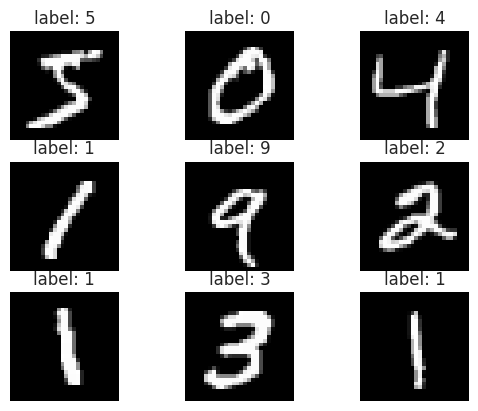

In [4]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
 
#loading
(train_X, train_y), (test_X, test_y) = mnist.load_data()
 
#shape of dataset
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
 
#plotting
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.cm.gray)
    plt.axis('off')
    plt.title(f'label: {train_y[i]}')

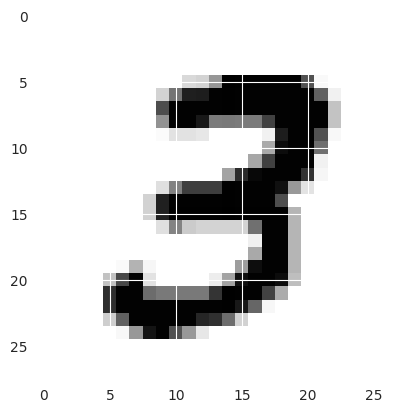

In [27]:
digit = train_X[7]
plt.imshow(digit, cmap="binary")
plt.show()

In [28]:
digit.shape

(28, 28)

In [29]:
from numpy.linalg import eig, inv
from numpy.linalg import svd, pinv, inv


U,d,Vt = svd(digit)
D = np.diag(d)

np.allclose(digit, U @ D @ Vt)

True

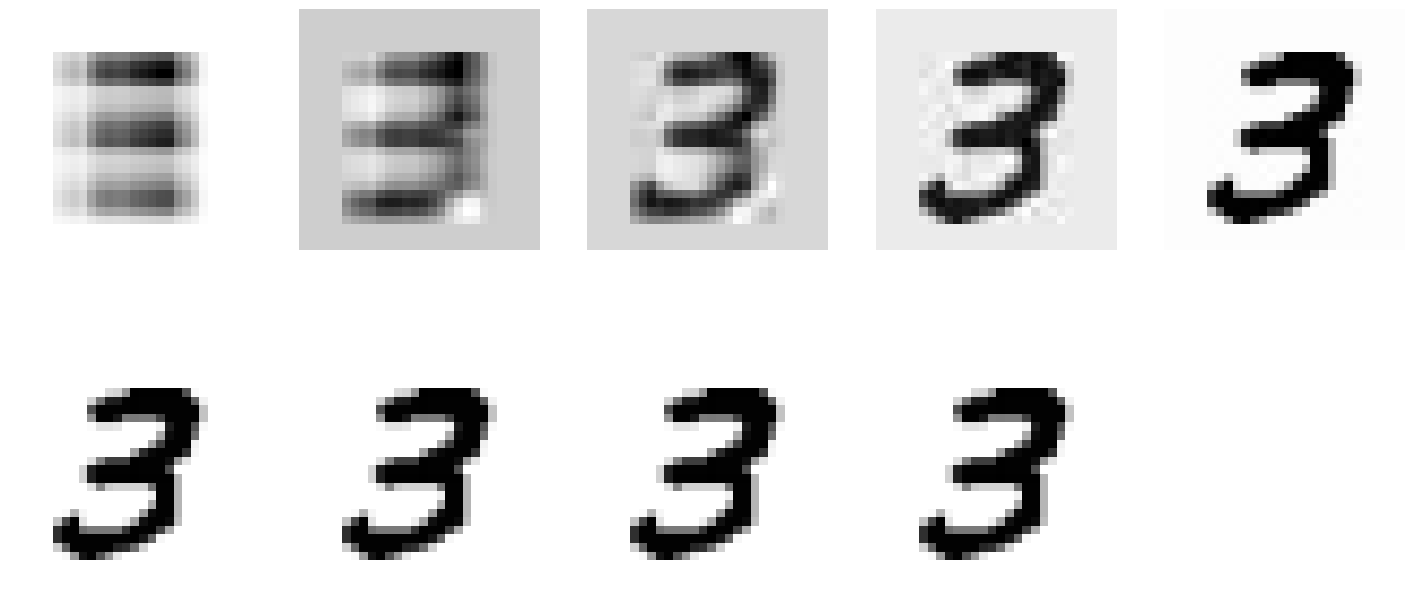

In [31]:
# k looping through sequence of powers of 2

j = 0
plt.figure(figsize=(18, 8))
for k in [1 << i for i in range(9)]:
    plt.subplot(2,5,j+1)
    j += 1
    ## construct approximation of X with first $k$ dimensions
    X_approx = U[:,:k] @ D[:k,:k] @ Vt[:k,:]
    plt.imshow(X_approx, cmap="binary")
    plt.axis('off')


In [39]:
print(f"{len(train_X)} train instances de {train_X.shape[1], train_X.shape[2]}")
print("9 digits diferents")

60000 train instances de (28, 28)
9 digits diferents


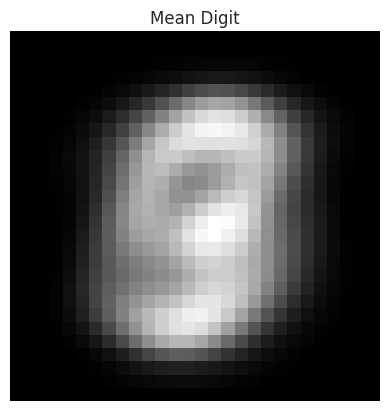

In [47]:
mean_digit = train_X.mean(axis=0)
plt.imshow(mean_digit, cmap=plt.cm.gray)
plt.title("Mean Digit")
plt.axis('off')
plt.show()

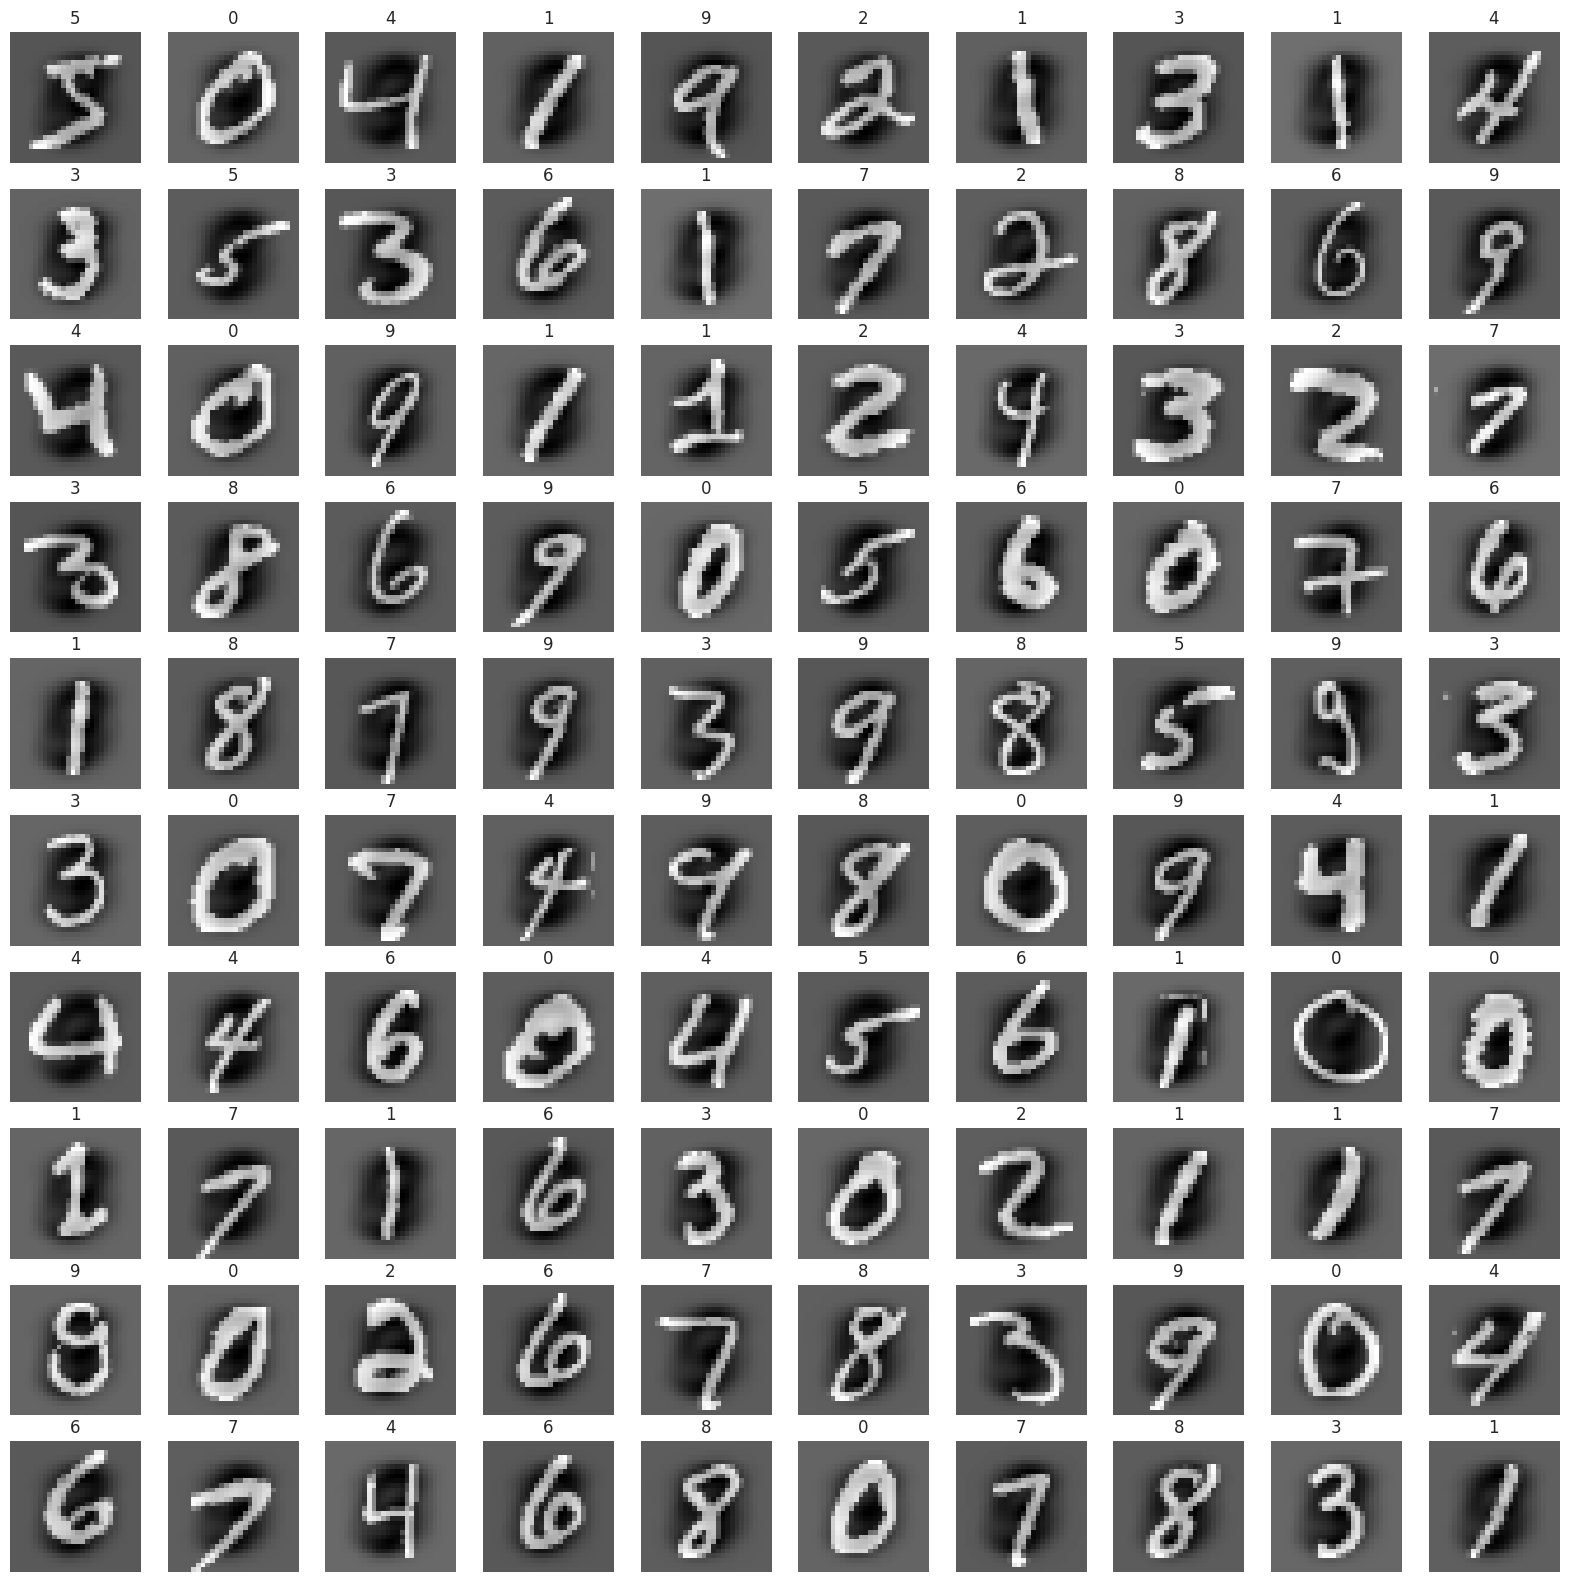

In [51]:
Ctrain_X = train_X - mean_digit

plt.figure(figsize=(20, 20))
for i in range(10*10):
    plt.subplot(10,10,i+1)
    plt.imshow(Ctrain_X[i], cmap=plt.cm.gray)
    plt.axis('off')
    plt.title(train_y[i])


In [62]:
Ctrain_X.shape
Ctrain_X = Ctrain_X.reshape(Ctrain_X.shape[0], -1)
Ctrain_X.shape

(60000, 784)

In [63]:
%%time
U, d, Vt = svd(Ctrain_X, full_matrices=False)

CPU times: user 1min 24s, sys: 43.2 s, total: 2min 7s
Wall time: 9.82 s


In [65]:
svd_X = U @ np.diag(d) @ Vt

print(np.allclose(Ctrain_X, svd_X, atol=1e-08))
print(np.allclose(Ctrain_X, svd_X, atol=1e-03))


True
True


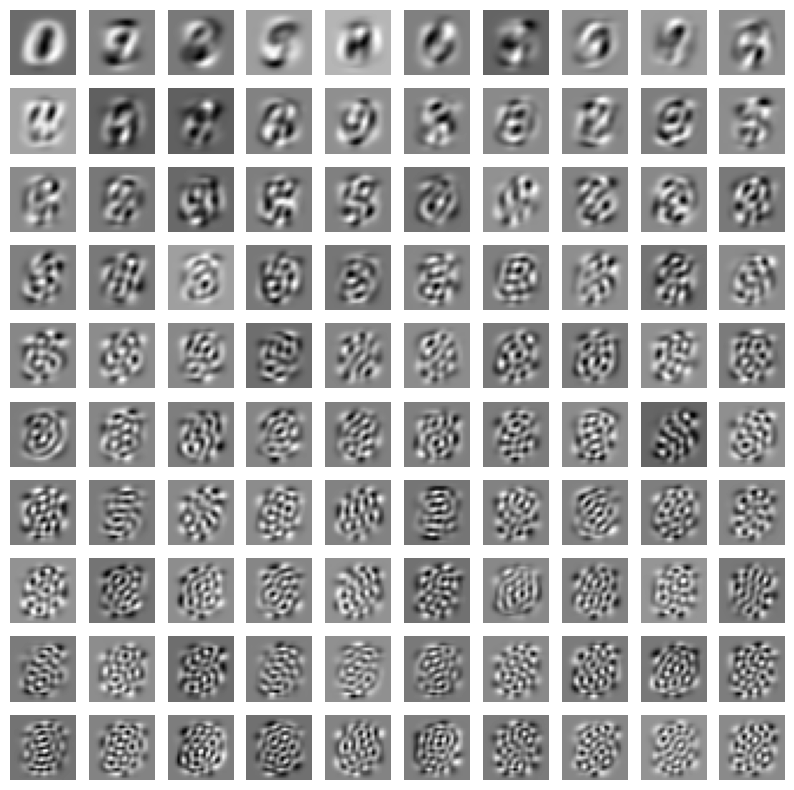

In [66]:
plt.figure(figsize=(10, 10))
for i in range(10*10):
    plt.subplot(10,10,i+1)
    plt.imshow(Vt[i,:].reshape(28, 28), cmap=plt.cm.gray)
    plt.axis('off')    

In [115]:
eights = [train_X[i] for i in range(len(train_X)) if train_y[i] == 0]
sixs = [train_X[i] for i in range(len(train_X)) if train_y[i] == 1]

eights_idx = [i for i in range(len(train_X)) if train_y[i] == 0]
sixs_idx = [i for i in range(len(train_X)) if train_y[i] == 1]

print(f'Found {len(eights)} images of eights; {len(sixs)} images of sixs')

Found 5923 images of eights; 6742 images of sixs


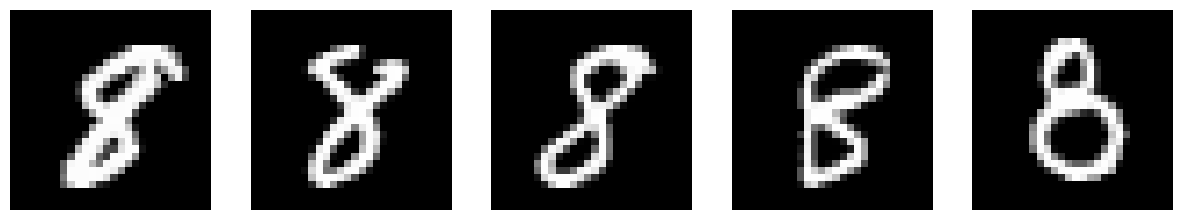

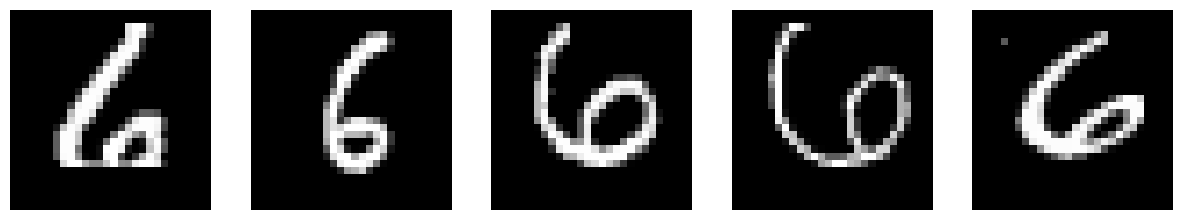

In [105]:
import random

def show_pics(flist, k):
    plt.figure(figsize=(15, 40))
    for i, idx in enumerate(random.sample(list(flist), k)):
        plt.subplot(1, k, i+1)
        plt.imshow(train_X[idx,:,:], cmap=plt.cm.gray)
        plt.axis('off')

show_pics(eights_idx, 5)
show_pics(sixs_idx, 5)

In [116]:
# get coordinates for both using 2 eigenfaces
eigen_modes = [4, 5]
def get_coord(flist):
    res = np.zeros((len(flist), 2))
    for i, idx in enumerate(list(flist)):
        x = train_X[idx,:,:].reshape(1 , -1) - mean_digit.reshape(1, -1)
        alpha = (x @ Vt.T).reshape(-1)
        res[i,:] = alpha[eigen_modes]
    return res
eight = get_coord(eights_idx)
six = get_coord(sixs_idx)

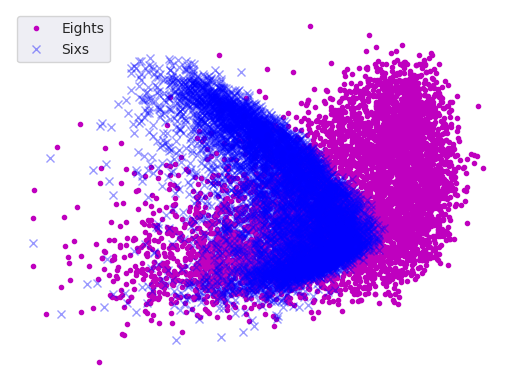

In [117]:
# plot them in 2D
plt.plot(eight[:,0], eight[:,1], '.', color='m', label='Eights')
plt.plot(six[:,0], six[:,1], 'x', color='b', label='Sixs', alpha=0.4)
plt.axis('off')
plt.legend()